1. Make a binary classification dataset with Scikit-Learn's `make_moons()` function. For consistency, the dataset should have 1000 samples and a `random_state=42`. Turn the data into PyTorch tensors.

2. Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

3. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1. Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

4. Setup a binary classification compatible loss function and optimizer to use when training the model.

5. Create a training and testing loop to fit the model you created in 2 to the data you created in 1. To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.

6. Train the model for long enough for it to reach over 96% accuracy. The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

7. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

8. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch. Feel free to reference the ML cheatsheet website for the formula.

9. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

10. Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

11. Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).

12. Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).

13. Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

In [1]:
import torch
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [24]:
N_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples=1000, random_state=42, noise=0.07)
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float).squeeze()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

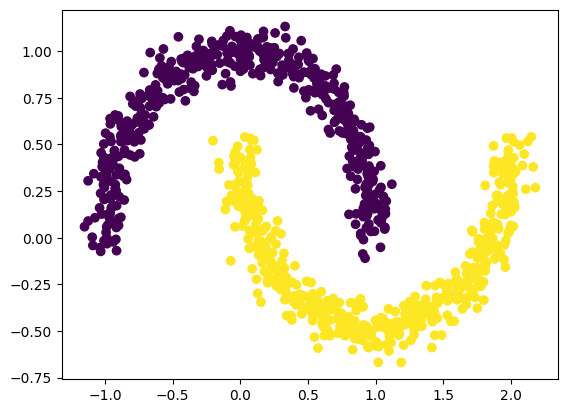

In [25]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y)

In [26]:
# clearly nonlinear
from torch import nn
class BinaryRegressor(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out1 = self.relu(self.layer1(x))
        return self.layer2(out1)
        

In [27]:
from torchmetrics.classification import BinaryAccuracy
ac_fn = BinaryAccuracy()

model_05 = BinaryRegressor()
loss_fn = nn.BCEWithLogitsLoss()
optim = torch.optim.Adam(params=model_05.parameters(), lr=.01)

In [32]:
epochs = 400

for epoch in range(epochs):
    model_05.train()
    y_pred = model_05(X_train).squeeze()
    loss = loss_fn(y_pred, y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if epoch % 10 == 0:
        model_05.eval()
        y_test_pred = model_05(X_test).squeeze()
        tst_loss = loss_fn(y_test_pred, y_test) 
        print(f'Epoch: {epoch} || Loss {loss}, Ac {ac_fn(y_pred, y_train)} || Test Loss {tst_loss}, test_ac {ac_fn(y_test_pred, y_test)}')


Epoch: 0 || Loss 0.17830489575862885, Ac 0.9275000095367432 || Test Loss 0.1763046383857727, test_ac 0.925000011920929
Epoch: 10 || Loss 0.16563251614570618, Ac 0.9325000047683716 || Test Loss 0.16310596466064453, test_ac 0.9350000023841858
Epoch: 20 || Loss 0.1533987671136856, Ac 0.9375 || Test Loss 0.15035033226013184, test_ac 0.9399999976158142
Epoch: 30 || Loss 0.14143060147762299, Ac 0.9399999976158142 || Test Loss 0.13787652552127838, test_ac 0.949999988079071
Epoch: 40 || Loss 0.1297602653503418, Ac 0.9437500238418579 || Test Loss 0.125815749168396, test_ac 0.9700000286102295
Epoch: 50 || Loss 0.11848726123571396, Ac 0.9537500143051147 || Test Loss 0.11418884992599487, test_ac 0.9750000238418579
Epoch: 60 || Loss 0.10769247263669968, Ac 0.9599999785423279 || Test Loss 0.10316150635480881, test_ac 0.9750000238418579
Epoch: 70 || Loss 0.09750325232744217, Ac 0.9674999713897705 || Test Loss 0.09283406287431717, test_ac 0.9800000190734863
Epoch: 80 || Loss 0.08803828060626984, Ac 0.

In [39]:
genX = torch.arange(-10,10,.5)
tanX = torch.tanh(genX)

def custom_tanh(x:torch.Tensor)-> torch.Tensor:
    return(torch.exp(genX) - torch.exp(-genX))/(torch.exp(genX) + torch.exp(-genX))

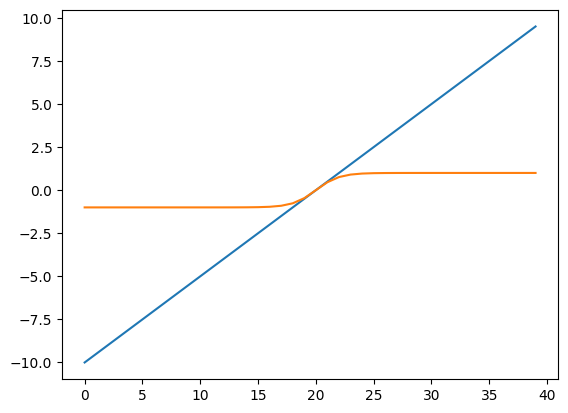

In [42]:
plt.plot(genX)
#plt.plot(tanX)
plt.plot(custom_tanh(genX))

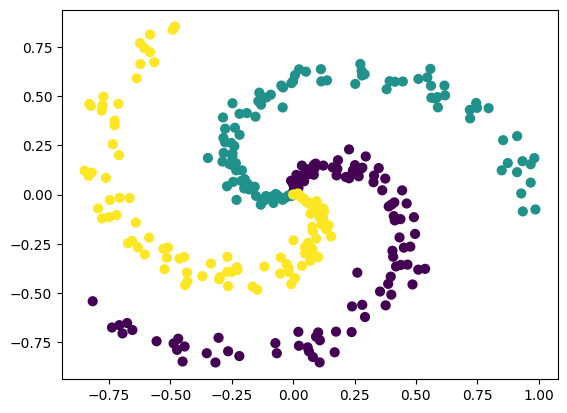

In [67]:
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.show()

In [68]:
#split into train test & code 
from sklearn.model_selection import train_test_split

X, y = torch.tensor(X).type(torch.float), torch.tensor(y).type(torch.long)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [69]:
from torch import nn
class logRegress2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        
        self.seq = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 3)
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.seq(x)

In [70]:
model_06 = logRegress2()

loss_fn = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(params=model_06.parameters(), lr=.01)

In [72]:
from torchmetrics.classification import MulticlassAccuracy
ac_fn = MulticlassAccuracy(3)
epoch = 200

for epoch in range(epochs):
    model_06.eval()
    y_pred_logits = model_06(X_train)
    loss = loss_fn(y_pred_logits, y_train)
    optim.zero_grad()
    loss.backward()
    optim.step()
    
    if epochs % 10 == 0:
        model_06.eval()
        with torch.inference_mode():
            y_pred_test_logits = model_06(X_test)
            test_loss = loss_fn(y_pred_test_logits, y_test)
            
            print(f'epoch {epoch}, loss {loss}, ac {ac_fn(y_pred_logits, y_train)}, test_loss {test_loss}, test_ac {ac_fn(y_pred_test_logits, y_test)} ')

epoch 0, loss 1.1141046285629272, ac 0.3333333432674408, test_loss 1.1070687770843506, test_ac 0.3333333432674408 
epoch 1, loss 1.1031605005264282, ac 0.3333333432674408, test_loss 1.0972610712051392, test_ac 0.3333333432674408 
epoch 2, loss 1.0938180685043335, ac 0.3333333432674408, test_loss 1.0882610082626343, test_ac 0.3333333432674408 
epoch 3, loss 1.0858063697814941, ac 0.3333333432674408, test_loss 1.079754114151001, test_ac 0.3333333432674408 
epoch 4, loss 1.078438401222229, ac 0.3539094626903534, test_loss 1.0720086097717285, test_ac 0.5015949010848999 
epoch 5, loss 1.0708845853805542, ac 0.5036404132843018, test_loss 1.0643404722213745, test_ac 0.6172248721122742 
epoch 6, loss 1.0627504587173462, ac 0.6054130792617798, test_loss 1.0563287734985352, test_ac 0.5247209072113037 
epoch 7, loss 1.0539799928665161, ac 0.5728078484535217, test_loss 1.0479168891906738, test_ac 0.41945773363113403 
epoch 8, loss 1.0446341037750244, ac 0.46992719173431396, test_loss 1.03933537006